In [1]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import copy

from EightBitTransit.cTransitingImage import TransitingImage
from EightBitTransit.inversion import *
from EightBitTransit.misc import *

%matplotlib inline

ImportError: No module named EightBitTransit.cTransitingImage

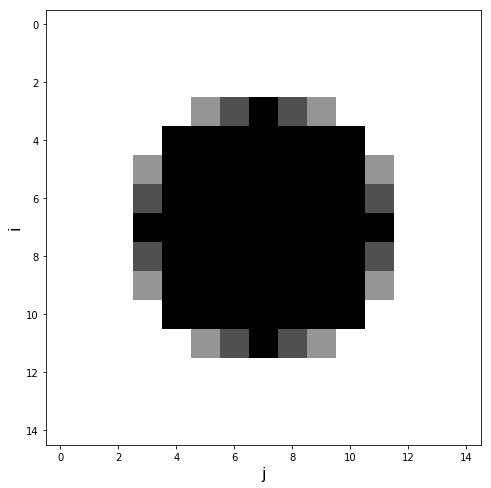

In [2]:
times = np.linspace(-5.0,5.0,500)

planetGrid = np.zeros((30,30))
planetGrid[6:24,13:17] = 1
planetGrid[13:17,6:24] = 1
planetGrid[7:23,10:20] = 1
planetGrid[10:20,7:23] = 1
planetGrid[8:22,8:22] = 1
planetGrid[9:21,9:21] = 1


planet = TransitingImage(opacitymat = planetGrid, lowres = 15, lowrestype="mean",lowresround = False, v = 4, t_ref = 0, t_arr = times)

planet.plot_grid()


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """Entry point for launching an IPython kernel.


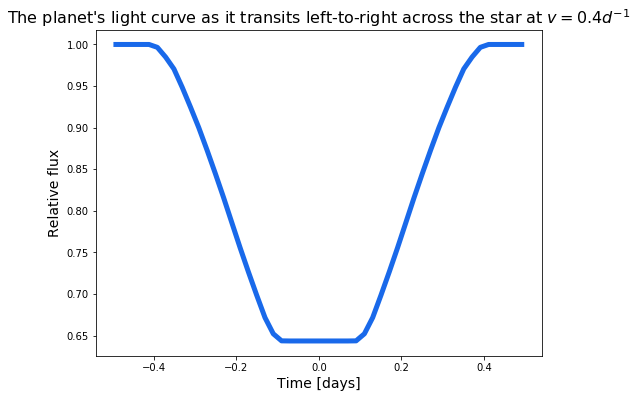

In [3]:
planetLC, overlapTimes = planet.gen_LC(t_arr = times)

fig, ax = plt.subplots(1,1,figsize=(8,6))
ax.plot(overlapTimes,planetLC,color="#1969ea",ls="-",lw=5)
plt.xlabel("Time [days]",fontsize=14)
plt.ylabel("Relative flux",fontsize=14)
plt.title(r"The planet's light curve as it transits left-to-right across the star at $v = 0.4 d^{-1}$",fontsize=16)
plt.show()



In [4]:
def ebtExtendLC(LC, overlapTimes, times): ##Extends a light curve from Eight Bit Transit by adding full flux to the ends for the desired length
    extendedLC = np.ones(len(times))##Start with full flux curve
    overlapIndex = 0
    for i in range(len(times)):##Iterate over the desired time array
        if times[i] == overlapTimes[overlapIndex]: ##When the desired time has caught up to the light curve from ebt, use the ebt values
            if overlapIndex < len(overlapTimes) - 1:##Only do this to the end of the ebt light curve
                overlapIndex += 1
                extendedLC[i] = LC[overlapIndex]
        
    
    return extendedLC, times

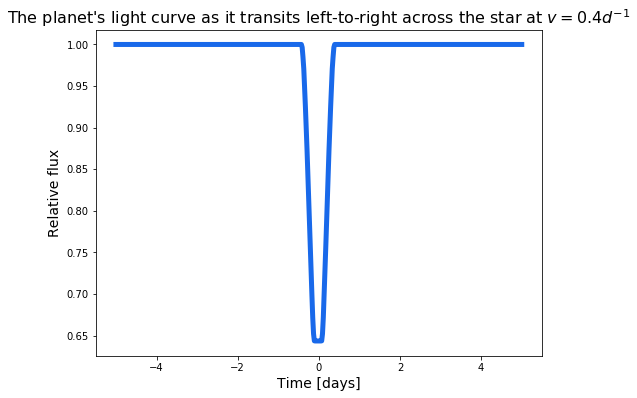

In [5]:
longLC, times = ebtExtendLC(planetLC, overlapTimes, times)

fig, ax = plt.subplots(1,1,figsize=(8,6))
ax.plot(times,longLC,color="#1969ea",ls="-",lw=5)
plt.xlabel("Time [days]",fontsize=14)
plt.ylabel("Relative flux",fontsize=14)
plt.title(r"The planet's light curve as it transits left-to-right across the star at $v = 0.4 d^{-1}$",fontsize=16)
plt.show()

In [6]:
def ebtSumLightCurves(trueLC, genLC): ##Sums a true light curve and a generated lightcurve
    if len(trueLC) - len(genLC) != 0:
        raise Exception("Light Curves must be the same size")
    sumLC = trueLC + genLC - 1 
    ##Generated Light curve has no noise, subtracting 1 from this light curve gives reduction due to transit
    ##Preserves noise in original light curve (average would half it)
    ##Assumes min value in both light curves >0.5, anything violating this assumption is grounds for further investigation in itself 
    return sumLC

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:30: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


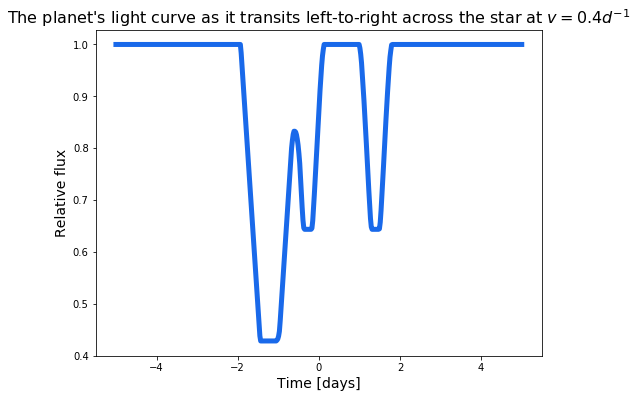

In [7]:
times = np.linspace(-5.0,5.0,500)

planetGrid = np.zeros((30,200))
planetGrid[6:24,13:17] = 1
planetGrid[13:17,6:24] = 1
planetGrid[7:23,10:20] = 1
planetGrid[10:20,7:23] = 1
planetGrid[8:22,8:22] = 1
planetGrid[9:21,9:21] = 1



planetGrid[6:24,113:117] = 1
planetGrid[7:23,110:120] = 1
planetGrid[8:22,108:122] = 1
planetGrid[10:20,107:123] = 1
planetGrid[13:17,106:124] = 1

planetGrid[8:22,147:1487] = 1
planetGrid[9:21,145:151] = 1
planetGrid[10:20,143:153] = 1
planetGrid[12:18,142:154] = 1
planetGrid[15:15,141:155] = 1





planet = TransitingImage(opacitymat = planetGrid, lowres = 15, lowrestype="mean",lowresround = False, v = 4, t_ref = 0, t_arr = times)
planetLC, overlapTimes = planet.gen_LC(t_arr = times)
longerLC, times = ebtExtendLC(planetLC, overlapTimes, times)

fig, ax = plt.subplots(1,1,figsize=(8,6))
ax.plot(times,longerLC,color="#1969ea",ls="-",lw=5)
plt.xlabel("Time [days]",fontsize=14)
plt.ylabel("Relative flux",fontsize=14)
plt.title(r"The planet's light curve as it transits left-to-right across the star at $v = 0.4 d^{-1}$",fontsize=16)
plt.show()

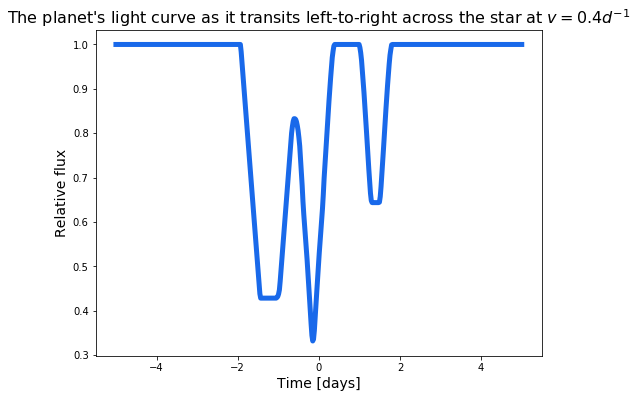

In [8]:
sumLC = ebtSumLightCurves(longLC,longerLC)

fig, ax = plt.subplots(1,1,figsize=(8,6))
ax.plot(times,sumLC,color="#1969ea",ls="-",lw=5)
plt.xlabel("Time [days]",fontsize=14)
plt.ylabel("Relative flux",fontsize=14)
plt.title(r"The planet's light curve as it transits left-to-right across the star at $v = 0.4 d^{-1}$",fontsize=16)
plt.show()

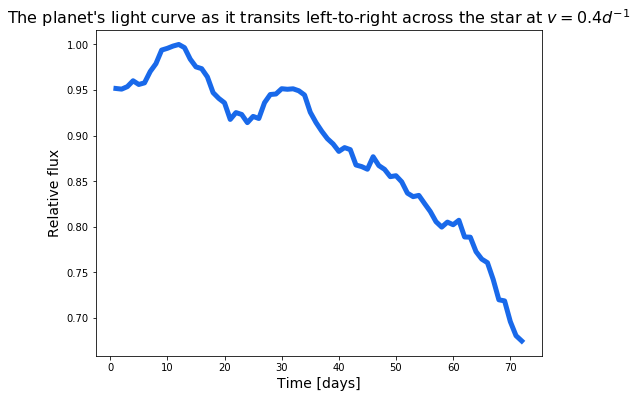

In [9]:
times, rawLC = np.loadtxt("lightcurves/ra1215d119lc.txt", unpack = True)

flux = 1/(10**(rawLC/2.5))
maxMag = max(flux)
trueLC = flux/maxMag

fig, ax = plt.subplots(1,1,figsize=(8,6))
ax.plot(times,trueLC,color="#1969ea",ls="-",lw=5)
plt.xlabel("Time [days]",fontsize=14)
plt.ylabel("Relative flux",fontsize=14)
plt.title(r"The planet's light curve as it transits left-to-right across the star at $v = 0.4 d^{-1}$",fontsize=16)
plt.show()




72


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


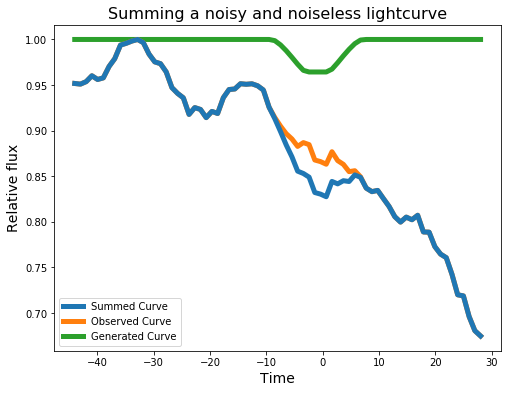

In [10]:
planetTimes = np.linspace(-44,28,72)

planetGrid = np.zeros((30,30))
planetGrid[6:24,13:17] = 0.1
planetGrid[13:17,6:24] = 0.1
planetGrid[7:23,10:20] = 0.1
planetGrid[10:20,7:23] = 0.1
planetGrid[8:22,8:22] = 0.1
planetGrid[9:21,9:21] = 0.1


planet = TransitingImage(opacitymat = planetGrid, lowres = 15, lowrestype="mean",lowresround = False, v = 0.2, t_ref = 0, t_arr = times)

print len(trueLC)


transitLC, overlapTimes = planet.gen_LC(t_arr = planetTimes)
longTransitLC, times = ebtExtendLC(transitLC, overlapTimes, planetTimes)
sumLC = ebtSumLightCurves(trueLC, longTransitLC)

fig, ax = plt.subplots(1,1,figsize=(8,6))
ax.plot(times,sumLC,ls="-",lw=5, label = "Summed Curve")
ax.plot(times,trueLC,ls='-',lw = 5, label = "Observed Curve", zorder = -1)
ax.plot(times,longTransitLC,ls='-',lw=5,label = "Generated Curve", zorder = -2)
ax.legend()
plt.xlabel("Time",fontsize=14)
plt.ylabel("Relative flux",fontsize=14)
plt.title(r"Summing a noisy and noiseless lightcurve",fontsize=16)
plt.show()